# PART 1

In [419]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy, copy

(x, y), (__, _) = fashion_mnist.load_data()

x_train = x[0:1000]/255
x_train_shape = x_train.shape
x_test = x[1000:1300]/255
x_test_shape = x_test.shape
y_train = y[0:1000]
y_test = y[1000:1300]

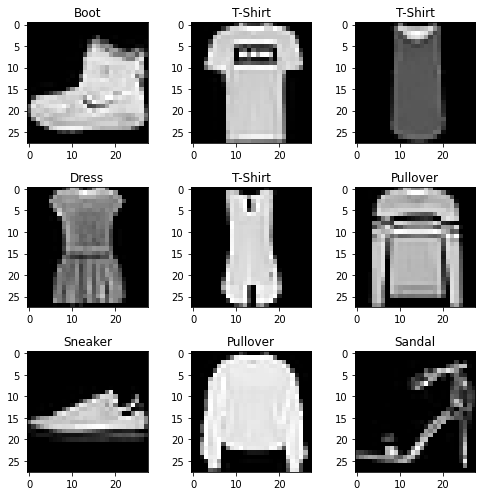

In [420]:
# show some of the pictures and their labels

labels = {0: 'T-Shirt', 1: 'Pants', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Boot'}

fig, axs = plt.subplots(3,3)
fig.set_figheight(7)
fig.set_figwidth(7)

for i in range(3):
  for j in range(3):
    axs[i,j].imshow(x_train[3*i+j], cmap='gray')
    axs[i,j].title.set_text(labels[y_train[3*i+j]])
fig.tight_layout()

In [421]:
# prepare data
x_train = x_train.reshape((x_train_shape[0], np.prod(x_train_shape[1:])))
x_test = x_test.reshape((x_test_shape[0], np.prod(x_test_shape[1:])))

# hyper parameters
n_neurons = (25,25)
alpha = 0.6
decay_rate = 0.5
R = 1
epochs = 20

In [422]:
W = np.random.random((len(x_train[0]),) + n_neurons)

In [423]:
from time import time

def min_distance_neuron(x, weight):
  l = len(x)
  difference = weight.reshape((weight.shape[0], np.prod(weight.shape[1:]))) - x.reshape((len(x),1))
  difference = difference.reshape(weight.shape)

  norm = np.linalg.norm(difference, axis=0)
  J = np.unravel_index(norm.argmin(), norm.shape)
  return J

def find_neighbors(J, shape, radius):
  neighbors = []
  for i in range(-radius, radius+1):
    for j in range(-radius, radius+1):
      if J[0]+i >=0 and J[1] + j>=0:
        if J[0]+i <= shape[0]-1 and J[1]+j <= shape[1]-1:
          neighbors.append((J[0]+i, J[1]+j))
  
  return np.array(neighbors)

def SOM(x, weight, radius, alpha, decay, epoch):
  neuron_shape = weight.shape
  start = time()
  for i in range(epoch):
    print(f'epoch {i+1}')
    for j in range(len(x)):
      J = min_distance(x[j], weight)
      neighbors = find_neighbors(J, neuron_shape[1:], radius)
      weight[:,neighbors[:,0],neighbors[:,1]] = weight[:,neighbors[:,0],neighbors[:,1]] * (1-alpha) + x[j].reshape((neuron_shape[0],1)) * alpha
    
    alpha = alpha * decay

  print("training time consumption = %.2f" %(time()-start), 'sec')

  return weight

In [424]:
W_new = SOM(x_train, W, radius=1, alpha=alpha, decay=decay_rate, epoch=epochs)

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
training time consumption = 56.05 sec


In [427]:
def predict(x, weight):
  neurons = []
  for i in range(len(x)):
    J = min_distance(x[i], weight)
    neurons.append(J)

  return neurons

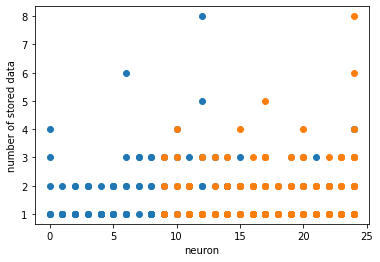

In [ ]:
from collections import Counter

pred = predict(x_test, W_new)
neurons_datacount = dict(Counter(pred))

plt.plot(list(neurons_datacount.keys()), list(neurons_datacount.values()), 'o')
plt.xlabel('neuron'), plt.ylabel('number of stored data')
keys = list(neurons_datacount.keys())

for item in keys:
  if neurons_datacount[item]<3:
    neurons_datacount.pop(item)

keys = list(neurons_datacount.keys())
values = list(neurons_datacount.values())

In [501]:
neurons_datacount

{(0, 15): 4,
 (0, 20): 3,
 (6, 23): 3,
 (6, 24): 6,
 (7, 22): 3,
 (7, 24): 3,
 (8, 20): 3,
 (8, 24): 3,
 (9, 17): 3,
 (9, 19): 3,
 (10, 10): 4,
 (10, 12): 3,
 (10, 24): 3,
 (11, 9): 3,
 (12, 14): 3,
 (12, 16): 3,
 (12, 17): 5,
 (12, 24): 8,
 (13, 10): 3,
 (13, 24): 3,
 (14, 23): 3,
 (15, 13): 3,
 (19, 17): 3,
 (20, 23): 3,
 (21, 17): 3,
 (24, 20): 4,
 (24, 24): 4}

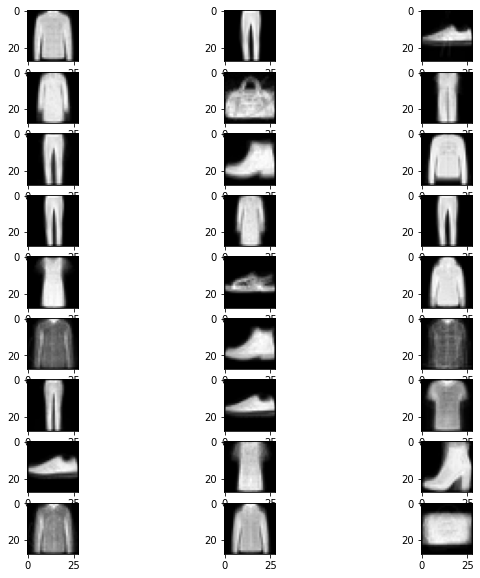

In [518]:
# depicting wining neurons
test_pic = []
for i in keys:
  test_pic.append(W_new[:,i[0],i[1]])

fig, axs = plt.subplots(9,3)
fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(9):
  for j in range(3):
    axs[i,j].imshow(test_pic[3*i+j].reshape((28,28)), cmap='gray')

# PART 2

In [630]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy, copy

(x, y), (__, _) = fashion_mnist.load_data()

x_train = x[0:1000]/255
x_train_shape = x_train.shape
x_test = x[1000:1300]/255
x_test_shape = x_test.shape
y_train = y[0:1000]
y_test = y[1000:1300]

# prepare data
x_train = x_train.reshape((x_train_shape[0], np.prod(x_train_shape[1:])))
x_test = x_test.reshape((x_test_shape[0], np.prod(x_test_shape[1:])))

In [631]:
# hyper parameters
n_neurons = (25,25)
sigma0 = 10
lambda_ = 10
R = 10
epochs = 20
alpha = 0.6

In [632]:
W = np.random.random((len(x_train[0]),) + (np.prod(n_neurons),))

In [650]:
from time import time

def min_distance_neuron(x, weight):
  l = len(x)
  difference = weight - x.reshape((len(x),1))
  difference = difference.reshape(weight.shape)

  norm = np.linalg.norm(difference, axis=0)
  J = np.argmin(norm)
  return J

def find_neighbors(J, shape, radius):

  neighbors = list(range(J-radius, J+radius+1))
  neighbors = np.array(neighbors)
  neighbors = np.delete(neighbors, np.where(neighbors > shape-1))
  neighbors = np.delete(neighbors, np.where(neighbors <0))

  indice_J = int(np.argwhere(neighbors==J))
  ln = len(neighbors)
  d = list(range(-indice_J, ln-indice_J))
  
  return neighbors, d

def SOM(x, weight, radius, alpha, epoch):
  neuron_shape = weight.shape
  beta = 0
  sigma = 0
  start = time()
  for i in range(epoch):
    print(f'epoch {i+1}')
    for j in range(len(x)):
      J =  min_distance(x[j], weight)[0]
      neighbors, d = find_neighbors(J, neuron_shape[1], radius)
      for n, distance in zip(neighbors, d):
        sigma = sigma0 * np.exp(-(i+1)/lambda_) 
        beta = np.exp(-(distance**2)/(2*sigma**2))
        weight[:,n] = weight[:,n] * (1-sigma*beta) + x[j] * alpha*beta
    alpha = alpha*0.5
  print("training time consumption = %.2f" %(time()-start), 'sec')

  return weight

In [651]:
W_new = SOM(x_train, W,alpha=alpha radius=R, epoch=epochs)

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6


/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2561: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


epoch 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in multiply


epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
training time consumption = 63.63 sec


In [652]:
def predict(x, weight):
  neurons = []
  for i in range(len(x)):
    J = min_distance(x[i], weight)
    neurons.append(J)

  return neurons

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


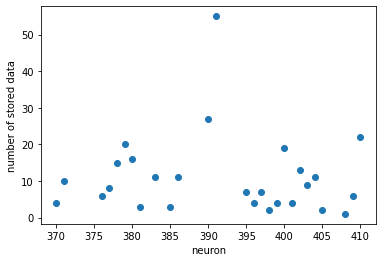

In [653]:
from collections import Counter

pred = predict(x_test, W_new)
neurons_datacount = dict(Counter(pred))

plt.plot(list(neurons_datacount.keys()), list(neurons_datacount.values()), 'o')
plt.xlabel('neuron'), plt.ylabel('number of stored data')
keys = list(neurons_datacount.keys())

for item in keys:
  if neurons_datacount[item]<3:
    neurons_datacount.pop(item)

keys = list(neurons_datacount.keys())
values = list(neurons_datacount.values())

In [658]:
neurons_datacount

{(370,): 4,
 (371,): 10,
 (376,): 6,
 (377,): 8,
 (378,): 15,
 (379,): 20,
 (380,): 16,
 (381,): 3,
 (383,): 11,
 (385,): 3,
 (386,): 11,
 (390,): 27,
 (391,): 55,
 (395,): 7,
 (396,): 4,
 (397,): 7,
 (399,): 4,
 (400,): 19,
 (401,): 4,
 (402,): 13,
 (403,): 9,
 (404,): 11,
 (409,): 6,
 (410,): 22}

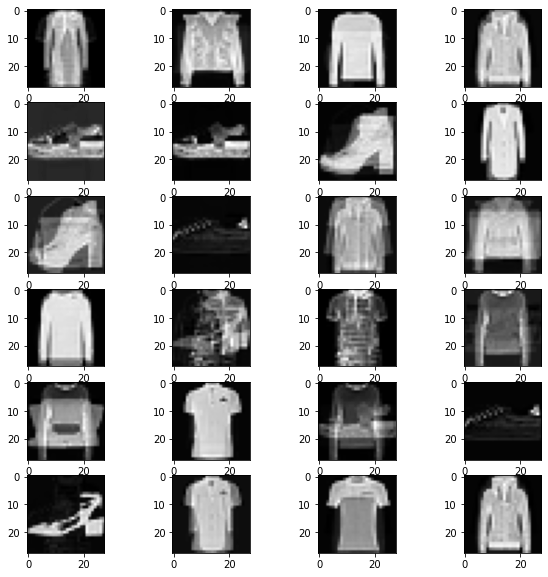

In [659]:
# depicting wining neurons
test_pic = []
for i in keys:
  test_pic.append(W_new[:,i])

fig, axs = plt.subplots(6,4)
fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(6):
  for j in range(4):
    axs[i,j].imshow(test_pic[4*i+j].reshape((28,28)), cmap='gray')